In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
# Dane:https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# "Ten baseline variables, age, sex, body mass index, average blood pressure, 
# and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."
# diabetes = datasets.load_diabetes()
# data = diabetes.data # nalezy je przekształcić do pandasowego dataframe'u
data = pd.read_csv('diabetes.csv')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
## Atrybuty + Zmienna modelowana
data.columns.tolist()

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

In [4]:
data.shape

(442, 11)

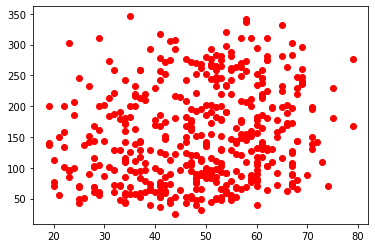

In [6]:
plt.scatter(data.AGE, data.Y,  color='red')

In [7]:
np.corrcoef(data.AGE, data.Y) #numpy

array([[1.        , 0.18788875],
       [0.18788875, 1.        ]])

In [8]:
data.AGE.corr(data.Y) # pandas

0.18788875071891972

In [9]:
corr = data.corr()
corr

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<AxesSubplot:>

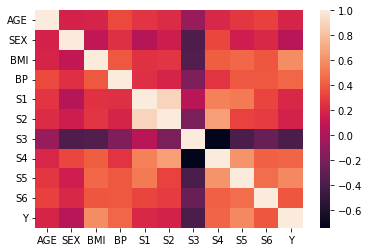

In [10]:
import seaborn as sns
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

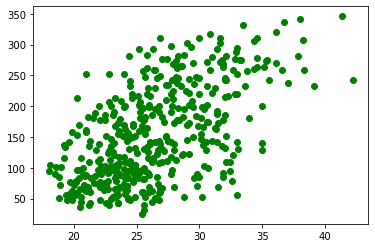

In [13]:
plt.scatter(data.BMI, data.Y,  color='green')

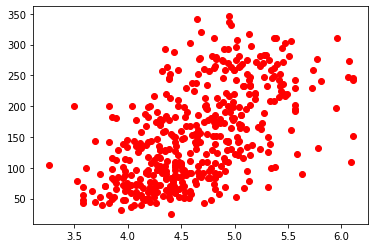

In [14]:
plt.scatter(data.S5, data.Y,  color='red')

In [15]:
data.isnull().values.any()

False

In [17]:
dataset = data.iloc[:,:-1] # wyodrebniamy zmienne objaśniające bez targetu
dataset

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [37]:
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BMI']], data.Y, test_size=0.2, random_state=0)

In [38]:
# 1. Tworzymy obiekt modelu
model = LinearRegression()
# 2. Trenujemy model na danych treningowych
model.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model.score(X_test, y_test)

0.19057346847560142

In [39]:
model.coef_ # Podejrzyjmy współczynniki modelu

array([10.58040081])

Text(0.5, 0, 'Importance')

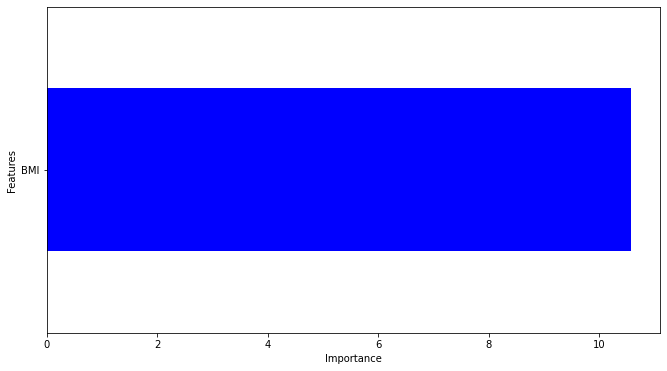

In [40]:
# Wizualizacja współczynników zmiennych w przypadku więcej niż jednej zmiennej objaśniającej
coeff = list(model.coef_)
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [41]:
model.intercept_ # Punkt przecięcia prostej z osią Y

-126.77820035769687

In [42]:
predykcje = model.predict(X_test)

In [43]:
predykcje

array([255.17426905, 211.79462571, 161.0087018 , 129.26749936,
       196.98206457, 247.76798848, 123.97729895, 174.76322286,
       205.44638522, 198.04010465,  95.41021675, 198.04010465,
       115.5129783 , 107.04865765, 239.30366783, 130.32553944,
        94.35217667, 101.75845724,  70.01725479, 191.69186416,
       180.05342327, 163.12478196, 128.20945928, 209.67854555,
       206.5044253 , 169.47302245, 111.28081797, 108.10669773,
       156.77654147, 177.9373431 , 149.3702609 , 100.70041716,
       141.96398033, 140.90594025, 146.19614066, 172.6471427 ,
       136.67377993, 143.02202042, 153.60242123, 185.34362367,
        88.00393618, 141.96398033, 145.13810058, 148.31222082,
       182.16950343,  92.23609651, 133.49965968, 176.87930302,
       119.74513862, 185.34362367, 130.32553944, 105.99061756,
       170.53106253, 144.0800605 , 194.86598441, 134.55769976,
       182.16950343, 148.31222082, 147.25418074, 164.18282204,
       192.74990424, 175.82126294, 201.2142249 , 131.38

In [47]:
# Mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

# Dla wiecej niz 1 zmienna objasniajaca
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predykcje)

Mean squared error: 4150.68


4150.6801893299835

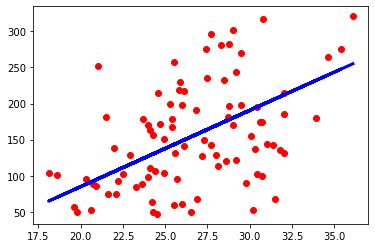

In [48]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, predykcje, color='blue', linewidth=3)
plt.show()

In [49]:
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BMI', 'S5', 'S4']], data.Y, test_size=0.2, random_state=0)

In [50]:
# 1. Tworzymy obiekt modelu
model1 = LinearRegression()
# 2. Trenujemy model na danych treningowych
model1.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model1.score(X_test, y_test)

0.2855703139021728

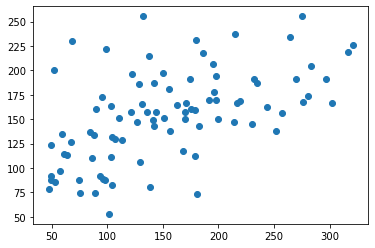

In [51]:
predykcje = model1.predict(X_test)
plt.scatter(y_test, predykcje)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, data.Y, test_size=0.2, random_state=0)

In [53]:
# 1. Tworzymy obiekt modelu
model2 = LinearRegression()
# 2. Trenujemy model na danych treningowych
model2.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model2.score(X_test, y_test)

0.33223321731061817

Text(0.5, 0, 'Importance')

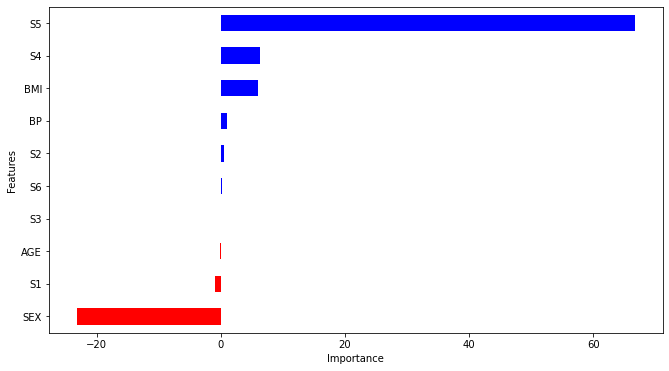

In [54]:
# Wizualizacja współczynników zmiennych w przypadku więcej niż jednej zmiennej objaśniającej
coeff = list(model2.coef_)
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## Zadania

1. Zbuduj model używając tylko jednej zmiennej dla pozostałych atrybutów i wybierz ten, który uzyskuje najlepsze wyniki pomiaru jakości regresji. Następnie porównaj najlepiej działający model z regresją wyuczoną na wszystkich zmiennych objaśniających.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data[['AGE']], data.Y, test_size=0.2, random_state=0)
model_age = LinearRegression()
model_age.fit(X_train, y_train)
r2_age = model_age.score(X_test, y_test)
print(r2_age)
predykcje_age = model_age.predict(X_test)
print(mean_squared_error(y_test, predykcje_age))

0.03400038308863318
4953.575545964795


In [105]:
X_train, X_test, y_train, y_test = train_test_split(data[['SEX']], data.Y, test_size=0.2, random_state=0)
model_sex = LinearRegression()
model_sex.fit(X_train, y_train)
r2_sex = model_sex.score(X_test, y_test)
print(r2_sex)
predykcje_sex = model_sex.predict(X_test)
print(mean_squared_error(y_test, predykcje_sex))

0.001552773240462657
5119.9645215451565


In [85]:
X_train, X_test, y_train, y_test = train_test_split(data[['BMI']], data.Y, test_size=0.2, random_state=0)
model_bmi = LinearRegression()
model_bmi.fit(X_train, y_train)
r2_bmi = model_bmi.score(X_test, y_test)
print(r2_bmi)
predykcje_bmi = model_bmi.predict(X_test)
print(mean_squared_error(y_test, predykcje_bmi))

0.19057346847560142
4150.6801893299835


In [81]:
X_train, X_test, y_train, y_test = train_test_split(data[['BP']], data.Y, test_size=0.2, random_state=0)
model_bp = LinearRegression()
model_bp.fit(X_train, y_train)
r2_bp = model_bp.score(X_test, y_test)
print(r2_bp)
predykcje_bp = model_bp.predict(X_test)
print(mean_squared_error(y_test, predykcje_bp))

0.18725935383524006
4167.674727372874


In [86]:
X_train, X_test, y_train, y_test = train_test_split(data[['S1']], data.Y, test_size=0.2, random_state=0)
model_s1 = LinearRegression()
model_s1.fit(X_train, y_train)
r2_s1 = model_s1.score(X_test, y_test)
print(r2_s1)
predykcje_s1 = model_s1.predict(X_test)
print(mean_squared_error(y_test, predykcje_s1))

0.04755806530178808
4884.052740887733


In [87]:
X_train, X_test, y_train, y_test = train_test_split(data[['S2']], data.Y, test_size=0.2, random_state=0)
model_s2 = LinearRegression()
model_s2.fit(X_train, y_train)
r2_s2 = model_s2.score(X_test, y_test)
print(r2_s2)
predykcje_s2 = model_s2.predict(X_test)
print(mean_squared_error(y_test, predykcje_s2))

0.04995955133000085
4871.738095772897


In [88]:
X_train, X_test, y_train, y_test = train_test_split(data[['S3']], data.Y, test_size=0.2, random_state=0)
model_s3 = LinearRegression()
model_s3.fit(X_train, y_train)
r2_s3 = model_s3.score(X_test, y_test)
print(r2_s3)
predykcje_s3 = model_s3.predict(X_test)
print(mean_squared_error(y_test, predykcje_s3))

0.006391734558824802
5095.150681006432


In [89]:
X_train, X_test, y_train, y_test = train_test_split(data[['S4']], data.Y, test_size=0.2, random_state=0)
model_s4 = LinearRegression()
model_s4.fit(X_train, y_train)
r2_s4 = model_s4.score(X_test, y_test)
print(r2_s4)
predykcje_s4 = model_s4.predict(X_test)
print(mean_squared_error(y_test, predykcje_s4))

0.10886865539624269
4569.656508752966


In [90]:
X_train, X_test, y_train, y_test = train_test_split(data[['S5']], data.Y, test_size=0.2, random_state=0)
model_s5 = LinearRegression()
model_s5.fit(X_train, y_train)
r2_s5 = model_s5.score(X_test, y_test)
print(r2_s5)
predykcje_s5 = model_s5.predict(X_test)
print(mean_squared_error(y_test, predykcje_s5))

0.19787113965189806
4113.2582640532655


In [91]:
X_train, X_test, y_train, y_test = train_test_split(data[['S6']], data.Y, test_size=0.2, random_state=0)
model_s6 = LinearRegression()
model_s6.fit(X_train, y_train)
r2_s6 = model_s6.score(X_test, y_test)
print(r2_s6)
predykcje_s6 = model_s6.predict(X_test)
print(mean_squared_error(y_test, predykcje_s6))

0.14792764300640993
4369.364870445185


In [112]:
max(r2_age, r2_sex, r2_bmi, r2_bp, r2_s1, r2_s2, r2_s3, r2_s4, r2_s5, r2_s6)

0.19787113965189806

In [113]:
X_train, X_test, y_train, y_test = train_test_split(dataset, data.Y, test_size=0.2, random_state=0)
model_all = LinearRegression()
model_all.fit(X_train, y_train)
r2_all = model_all.score(X_test, y_test)
print(r2_all)
predykcje_all = model_all.predict(X_test)
print(mean_squared_error(y_test, predykcje_all))

0.33223321731061817
3424.259334298693


In [114]:
max(r2_bmi, r2_all)

0.33223321731061817

2. Korzystając z danych boston, przeprowadź analogiczną analizę - wybierz trzy najbardziej skorelowane zmienne objaśniające z targetem, a następnie zbuduj na nich model regresji liniowej. Sprawdź wyniki pomiaru błędu predykcji

In [165]:
data = datasets.load_boston()

In [166]:
# Zmienne objaśniające 
df = pd.DataFrame(data.data, columns=data.feature_names)

# Zmienna objaśniana
target = pd.DataFrame(data.target, columns=["MEDV"])

In [149]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [167]:
df.isnull().values.any()

False

In [169]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [168]:
target.isnull().values.any()

False

In [151]:
df.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [170]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<AxesSubplot:>

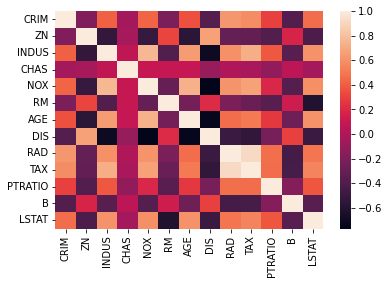

In [171]:
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [172]:
# Szukanie koleracji pomiędzy zmiennymi objaśniającymi
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations
RAD    TAX    0.910228
NOX    DIS    0.769230
INDUS  NOX    0.763651
dtype: float64


In [187]:
# Szukanie najbardziej skorelowanych zmiennych z targetem
print(df.CRIM.corr(target.MEDV))
print(df.ZN.corr(target.MEDV))
print(df.INDUS.corr(target.MEDV))
print(df.CHAS.corr(target.MEDV))
print(df.NOX.corr(target.MEDV))
print(df.RM.corr(target.MEDV))
print(df.AGE.corr(target.MEDV))
print(df.DIS.corr(target.MEDV))
print(df.RAD.corr(target.MEDV))
print(df.TAX.corr(target.MEDV))
print(df.PTRATIO.corr(target.MEDV))
print(df.B.corr(target.MEDV))
print(df.LSTAT.corr(target.MEDV))

-0.3883046085868114
0.3604453424505433
-0.4837251600283728
0.17526017719029818
-0.4273207723732824
0.695359947071539
-0.37695456500459606
0.24992873408590388
-0.38162623063977746
-0.46853593356776696
-0.5077866855375615
0.33346081965706637
-0.7376627261740148


In [202]:
X_train, X_test, y_train, y_test = train_test_split(df[['LSTAT','RM','PTRATIO']], target.MEDV, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
print(r2)
predykcje = model.predict(X_test)
print(mean_squared_error(y_test, predykcje))

0.488164201569251
41.677990122216805


In [203]:
print(model.coef_)
print(model.intercept_)

[-0.57552137  4.26494747 -1.13654724]
24.03109342937114


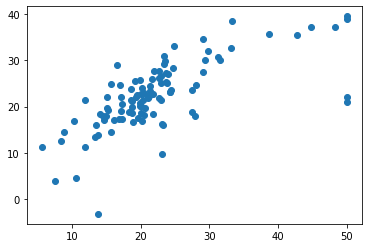

In [209]:
plt.scatter(y_test, predykcje)